# Modelo SVM

1. Impormos las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

2. Cargamos y preparamos el dataset

In [2]:
# Cargar el conjunto de datos de iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

3. Entrenamos al modelo

In [5]:
# Crear el clasificador SVM con un kernel lineal
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Entrenar el modelo
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

4. Realizamos las predicciones y evaluamos el modelo

In [7]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

5. Visualizamos

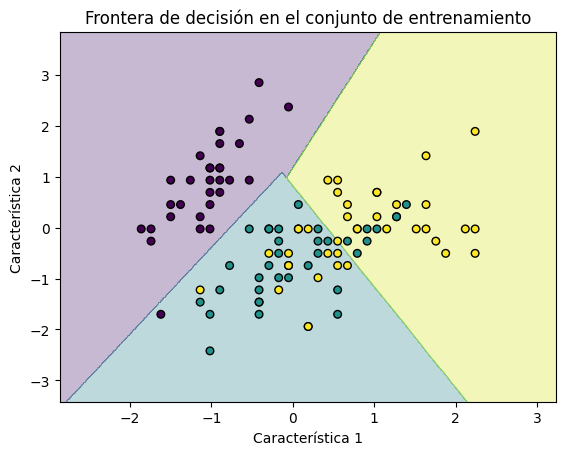

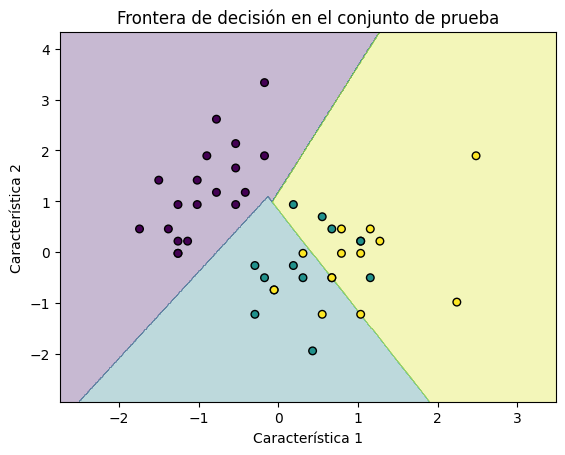

In [9]:
# Elegir dos características para visualizar
X_vis = X[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

# Estandarizar las características
X_train_vis = scaler.fit_transform(X_train_vis)
X_test_vis = scaler.transform(X_test_vis)

# Entrenar el modelo SVM para las dos características seleccionadas
svm_classifier_vis = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier_vis.fit(X_train_vis, y_train_vis)

# Visualizar el hiperplano de separación
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.show()

plot_decision_boundary(X_train_vis, y_train_vis, svm_classifier_vis, "Frontera de decisión en el conjunto de entrenamiento")
plot_decision_boundary(X_test_vis, y_test_vis, svm_classifier_vis, "Frontera de decisión en el conjunto de prueba")

In [10]:
#Importante: La parte de evaluacion de modelos, lo veremos en otra clase! :)